## **Impact of the workplace environment on Mental Health**

### **DATA 512 Project**

### **Kirti Kharb**

### **I. Motivation and problem statement**



Mental health has become a serious concern in the 21st century. As people in technical jobs lead a sedentary lifestyle and have very few social engagements outside their workplace, It is important to study the factors in a workplace that affect an individual’s mental health. I want to know how employers can take measures to promote their employee’s mental health and spread awareness to address this growing concern. Aside from company policies with regard to health, leaves, insurance, etc., the ability to comfortably communicate health problems with colleagues and supervisors can have a serious impact on an employee’s mental health. 

### **II. Datasets**

For this project, I use the following dataset that is publicly available on [Kaggle](https://www.kaggle.com/).
- [OSMI Mental Health In Tech Survey 2014](https://www.kaggle.com/osmi/mental-health-in-tech-survey) licensed under [CC BY-SA 4.0](https://creativecommons.org/licenses/by-sa/4.0/)
The dataset is owned by [OSMI](https://osmihelp.org) and the contents of the website are also licensed under a [Creative Commons Attribution-ShareAlike 4.0 International License](https://creativecommons.org/licenses/by-sa/4.0/). It contains qualitative survey data conducted in the year 2019 about mental health in Tech and answers a range of questions about employers’ mental health policies along with candidates’ age, race, gender, and country of work and residence.
 
This dataset contains all the necessary qualitative and quantitative information needed to analyze the problem at hand. Although the OSMI survey results are anonymized and do not contain PII, it still has sensitive demographic data(age, gender). The results of the analysis are purely to understand the factors affecting the mental health of people in tech and is not meant for disrespecting anyone.
 
All the raw data collected for the analysis is stored in [data/raw](./data/raw) folder.
 
 



### **III. Unknowns and dependencies**

The Mental Health in Tech Survey data is skewed in the sense that the majority of survey participants are from the US and very few from low-income countries. The survey has answers from 1259 participants about 26 questions. The small sample size and skewness will create problems in making any strong claims on whether the region/country affects the mental health of people working there. It does not appear that the survey was administered to a representative sample and so, we won't be able to generalize the findings to a broader population. Also, as it is qualitative data, the analysis will heavily depend on the range of options for each categorical question. There might not be sufficient objectivity and also some bias in data collection steps. The variable, treatment (Have you sought treatment for a mental health condition?) may not be representative of the fact that whether an individual suffers from a mental illness. 

### **IV. Research Questions**

Q1. How does the frequency of mental health illness vary by age, gender, country?<br>
**Hypothesis**: The frequency of mental health illness is different for different demographic indicators.

Q2. Does a family history of mental health illness impact the frequency of mental health illnesses?<br>
**Hypothesis**: The frequency of mental health illness is independent of family history of mental health.

Q3. Does attitude towards mental health impact an individual’s decision to seek treatment for a mental health condition?<br>
**Hypothesis**: The attitude towards mental health does not impact the individual’s decision to seek treatment for a mental health condition.

Q4. What are the strongest predictors of mental health illness due to the workplace environment? <br>
**Hypothesis**: A workplace that provides medical health benefits, awareness for care options to employees, safe environment to discuss the mental health issues with supervisors and peers contribute towards the better mental health of employees as opposed to a workplace that does not prioritize their employees’ health.
 
 



### **V. Background/Related Work**

A related [paper](https://www.sas.com/content/dam/SAS/support/en/sas-global-forum-proceedings/2019/3966-2019.pdf) that measure the suicide tendencies in employees in the tech industry based on the mental health illnesses and certain attitudes towards mental health in the workplace suggests that suicides rates in individuals are direct linked to mental health conditions are vary considerably in different age groups, gender, region.
The study also suggests that companies that provide remote work, benefits, and awareness around mental health have a positive impact on employees’ mental health and in turn decrease suicidal tendencies.
 
The articles [here](https://www.infoq.com/articles/mental-health-tech-workplace/) suggests that the major hindrance to mental wellness in a workplace is that mental illnesses are stigmatized and employees do not feel comfortable speaking up when they have a mental health issue due to fear of losing their promotion or job.
 
The [OSMI](https://osmihelp.org/research) provides useful survey datasets from the years 2014
conducted every year which asks candidates about the mental health illness attitudes in their workplace(benefits, care options, a consequence of informing the employer about physical or mental health issues, awareness in employees related to employers policies and programs around mental health, ability to take leaves of absence, etc.) along with demography data(age, gender, country). OSMI also provides guidelines to promote mental wellness in the workplace to executives and HR professionals based on studies conducted on the survey results.
 
The above research and resources are the basis for the research questions and hypothesis that I plan to answer in this analysis and it would be interesting to see what factors in the workplace contribute to improved mental health.
 



### **VI. Methodology**

The process followed in divided into four main parts
1. Data Gathering
2. Data cleaning and Preprocessing
3. Exploratory Data Analysis
4. Answering the research questions

#### **1. Data Gathering**



Load the packages and survey data from [OSMI Mental Health In Tech Survey 2014](https://www.kaggle.com/osmi/mental-health-in-tech-survey) into a pandas dataframe and have a quick look at the columns and their values. 

In [153]:
# import libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore') 

# read data files
mhit = pd.read_csv("survey.csv")

# quick look at mental health in tech data
mhit.head(5)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


Inspect the data to understand the features, number of non-null values in each column and the datatypes.

In [154]:
mhit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

#### **2. Data cleaning and preprocessing**


##### **2.1 Dropping unnecessary columns**

Let us first remove the columns that are not needed for the analysis, which are 'comments' and 'Timestamp'.

In [155]:
mhit = mhit.drop(['comments','Timestamp'], axis= 1)
mhit.head(5)

,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


##### **2.2 Treating missing values**

We replace missing values by ‘NaN’ for string data type, 0 for int data type. 

In [156]:
# Assign default values for each data type
defaultInt = 0
defaultString = 'NaN'

# Create lists by features by dattypes
intFeatures = ['Age']
stringFeatures = ['Gender', 'Country', 'state', 'self_employed', 'family_history', 'treatment', 'work_interfere',
                 'no_employees', 'remote_work', 'tech_company', 'anonymity', 'leave', 'mental_health_consequence',
                 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview',
                 'mental_vs_physical', 'obs_consequence', 'benefits', 'care_options', 'wellness_program',
                 'seek_help']

# Treat missing values
for feature in mhit:
    if feature in intFeatures:
        mhit[feature] = mhit[feature].fillna(defaultInt)
    elif feature in stringFeatures:
        mhit[feature] = mhit[feature].fillna(defaultString)
    else:
        print('Error: Feature %s not recognized.' % feature)
mhit.head(5)                  

,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


##### **2.3 Clean up Gender column**

Check the kinds of values in the Gender

In [157]:
# Check count and types values in Gender
print(mhit["Gender"].unique())
print("distinct values in Gender: ", len(mhit["Gender"].unique()))

['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Femake' 'woman' 'Make' 'Nah'
 'All' 'Enby' 'fluid' 'Genderqueer' 'Female ' 'Androgyne' 'Agender'
 'cis-female/femme' 'Guy (-ish) ^_^' 'male leaning androgynous' 'Male '
 'Man' 'Trans woman' 'msle' 'Neuter' 'Female (trans)' 'queer'
 'Female (cis)' 'Mail' 'cis male' 'A little about you' 'Malr' 'p' 'femail'
 'Cis Man' 'ostensibly male, unsure what that really means']
distinct values in Gender:  49


The column ‘Gender’ contains 49 distinct responses. We clean up this column to just contain three gender type: Male, Female, Non-Binary

In [158]:
# Clean Gender
# convert all values to lower case
gender = mhit['Gender'].str.lower()

# Select unique elements
gender = mhit['Gender'].unique()

# new gender groups
male_str = ["male", "m", "male-ish", "maile", "mal", "male (cis)", "make", "male ", "man","msle", "mail", "malr","cis man", "Cis Male", "cis male"]
female_str = ["cis female", "f", "female", "woman",  "femake", "female ","cis-female/femme", "female (cis)", "femail"]
non_binary_str = ["trans-female", "something kinda male?", "queer/she/they", "non-binary","nah", "all", "enby", "fluid", "genderqueer", "androgyne", "agender", "male leaning androgynous", "guy (-ish) ^_^", "trans woman", "neuter", "female (trans)", "queer", "ostensibly male, unsure what that really means"]           

for (row, col) in mhit.iterrows():
    if str.lower(col.Gender) in male_str:
        mhit['Gender'].replace(to_replace=col.Gender, value='male', inplace=True)
    if str.lower(col.Gender) in female_str:
        mhit['Gender'].replace(to_replace=col.Gender, value='female', inplace=True)
    if str.lower(col.Gender) in non_binary_str:
        mhit['Gender'].replace(to_replace=col.Gender, value='non-binary', inplace=True)

# Remove meaningless values
garbage_vals = ['A little about you', 'p']
mhit = mhit[~mhit['Gender'].isin(garbage_vals)]

print(mhit['Gender'].unique())

['female' 'male' 'non-binary']


##### **2.4 Clean up Age column**

Check the Values in column 'Age'

In [159]:
# Check the range of values in Age
print("Maximum age: ", mhit["Age"].max()) 
print("Minimum age: ", mhit["Age"].min()) 

Maximum age:  99999999999
Minimum age:  -1726


Some values of age are too high or too low to be real numbers. We replace these values and missing values by median age as the survey is mostly filled by people working in tech industry, so we can assume that majority age-group of the participants to be a safe choice to replace null and out of range age values. We also create a new feature age_groups to be used in analysis later.


In [160]:
# Clean Age
# Replace missing values with median age
mhit['Age'].fillna(mhit['Age'].median(), inplace = True)

# Replace ages that are too low with median age
s = pd.Series(mhit['Age'])
s[s<18] = mhit['Age'].median()
mhit['Age'] = s

# Rplace ages that are too high with median age
s = pd.Series(mhit['Age'])
s[s>120] = mhit['Age'].median()
mhit['Age'] = s

# Create new feature for age-groups
mhit['age_groups'] = pd.cut(mhit['Age'], [0,20,30,65,100], labels=["0-20", "21-30", "31-65", "66-100"], include_lowest=True)

##### **2.5 Create new feature - region**

Next, we create a new feature region to divide the state into 4 major regions(West, South, Midwest, Northeast)

In [161]:
# Put each state in one of the regions: West, Midwest, South, Northeast

# Make a copy of the state column into regions
mhit['region'] = mhit['state']

# Assign each state in one of the new regions
west = ["WA", "OR", "CA", "NV", "ID", "MT", "WY", "UT", "AZ", "NM", "CO"]
midwest = ["ND", "SD", "NE", "KS", "MN", "IA", "MO", "WI", "IL", "IN", "OH", "MI"]
northeast = ["ME",  "NH", "VT", "MA", "CT", "RI", "NY", "PA", "NJ"]
south = ["MD", "DE", "DC", "WV",  "VA", "NC","SC", "GA", "FL", "KY", "TN", "AL", "MS", "AR", "LA", "OK", "TX"]
mhit['region'] = mhit['region'].apply(lambda x:"West" if x in west else x)
mhit['region'] = mhit['region'].apply(lambda x:"Midwest" if x in midwest else x)
mhit['region'] = mhit['region'].apply(lambda x:"Northeast" if x in northeast else x)
mhit['region'] = mhit['region'].apply(lambda x:"South" if x in south else x)

##### **2.6 Feature specific missing value treatment**

For the column self_employed, convert all 'NaN' values to not self-employed. 

In [162]:
# Replace NaN with No for self_employed
mhit['self_employed'] = mhit['self_employed'].replace([defaultString], 'No')
print(mhit['self_employed'].unique())

['No' 'Yes']


For the column work_interfere, convert all 'NaN' values to Don't Know.

In [163]:
# Replace NaN with Don't Know for work_interfere
mhit['work_interfere'] = mhit['work_interfere'].replace([defaultString], 'Don\'t know' )
print(mhit['work_interfere'].unique())

['Often' 'Rarely' 'Never' 'Sometimes' "Don't know"]


Let's again take a look at the data. 

In [164]:
mhit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1257 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Age                        1257 non-null   int64   
 1   Gender                     1257 non-null   object  
 2   Country                    1257 non-null   object  
 3   state                      1257 non-null   object  
 4   self_employed              1257 non-null   object  
 5   family_history             1257 non-null   object  
 6   treatment                  1257 non-null   object  
 7   work_interfere             1257 non-null   object  
 8   no_employees               1257 non-null   object  
 9   remote_work                1257 non-null   object  
 10  tech_company               1257 non-null   object  
 11  benefits                   1257 non-null   object  
 12  care_options               1257 non-null   object  
 13  wellness_program           1257 n

##### **2.7 Encoding categorical columns**

Now that we have treated all missing values and taken care of garbage values in the dataset, let's encode various categorical columns for further analysis.

In [165]:
# Encoding data
# Import packages
from sklearn import preprocessing

# Make a dictionary to store true labels for each feature
labelDict = {}

# Add label mappings for each feature in the dictionary
# extend the string features list with newly created features
stringFeatures += ["age_groups", "region"]

for feature in stringFeatures:
    le = preprocessing.LabelEncoder()
    le.fit(mhit[feature])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    mhit[feature] = le.transform(mhit[feature])
    # Get labels
    labelKey = 'label_' + feature
    labelValue = [*le_name_mapping]
    labelDict[labelKey] =labelValue
    
# Check the created labels    
for key, value in labelDict.items():     
    print(key, value)

# Quick look at the transformed data
mhit.head()

label_Gender ['female', 'male', 'non-binary']
label_Country ['Australia', 'Austria', 'Belgium', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Canada', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Czech Republic', 'Denmark', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Hungary', 'India', 'Ireland', 'Israel', 'Italy', 'Japan', 'Latvia', 'Mexico', 'Moldova', 'Netherlands', 'New Zealand', 'Nigeria', 'Norway', 'Philippines', 'Poland', 'Portugal', 'Romania', 'Russia', 'Singapore', 'Slovenia', 'South Africa', 'Spain', 'Sweden', 'Switzerland', 'Thailand', 'United Kingdom', 'United States', 'Uruguay', 'Zimbabwe']
label_state ['AL', 'AZ', 'CA', 'CO', 'CT', 'DC', 'FL', 'GA', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'NC', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'NaN', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']
label_self_employed ['No', 'Yes']
label_family_history ['No', 'Yes']
label_treatment

,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_groups,region
0,37,0,44,10,0,0,1,2,4,0,1,2,1,1,2,2,2,1,1,1,2,1,0,2,0,2,0
1,44,1,44,11,0,0,0,3,5,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,2,0
2,32,1,6,29,0,0,0,3,4,0,1,1,0,1,1,0,1,1,1,2,2,2,2,1,0,2,1
3,31,1,43,29,0,1,1,2,2,0,1,1,2,1,1,1,1,2,2,1,0,0,0,1,1,2,1
4,31,1,44,38,0,0,0,1,1,1,1,2,0,0,0,0,0,1,1,1,2,2,2,0,0,2,3


#### **3. Exploratory Data Analysis**

##### **3.1 Understanding correlations in data**

First, we check the correlation plot of all the variables to see which of them might be related. 

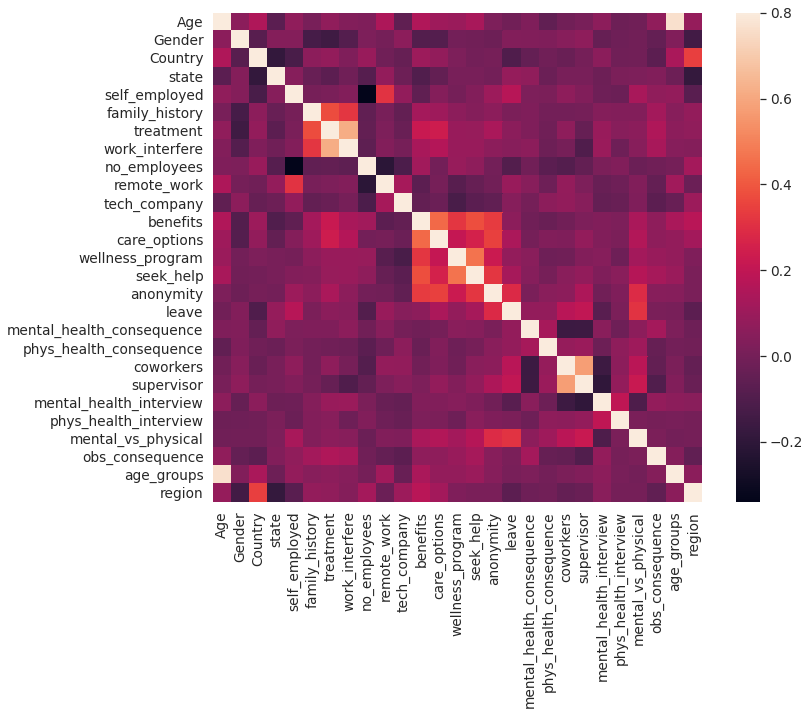

<Figure size 432x288 with 0 Axes>

In [166]:
# Import packages for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# correlation matrix
corrmat = mhit.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()
plt.savefig("Figures/corrplot.png", dpi=500)

We see some degree of correlation among benefits, care_options, seek_help, and anonymity. Also, we observe correlation between treatment and work_interfere.

Let's drill down to top 10 variables having maximum correlations with respect to outcome variable treatment.

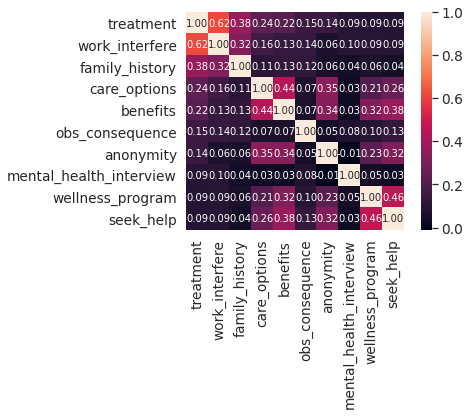

<Figure size 432x288 with 0 Axes>

In [167]:
#treatment correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'treatment')['treatment'].index
cm = np.corrcoef(mhit[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()
plt.savefig("Figures/corrplot_top10.png", dpi=500)

##### **3.2 Data distributions using two or more variables**

Next, we plot various graphs between two or more variables to get sense of distributions in data.
Below we plot a line graph to study the probability of mental health condition by age and gender.

##### **3.2.1 Treatment vs. Age and Gender**

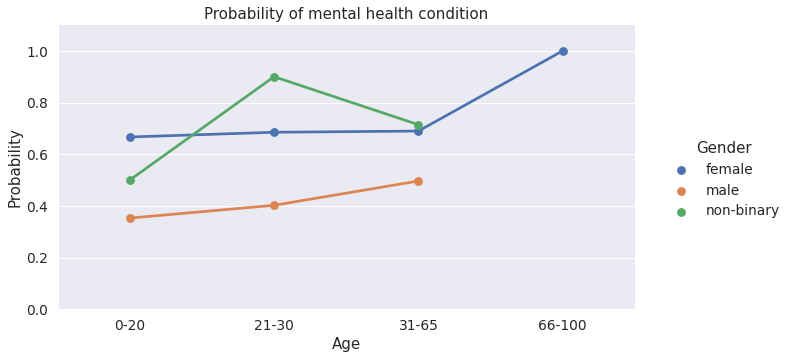

<Figure size 432x288 with 0 Axes>

In [168]:
# Plot to study the probability of mental health condition in different age groups and gender
# Get labels for age_groups
o = labelDict['label_age_groups']

# Create factorplot
g = sns.factorplot(x="age_groups", y="treatment", hue="Gender", data=mhit, kind="point",  ci=None, size=5, aspect=2, legend_out = True)
g.set_xticklabels(o)
g.set(ylim=(0, 1.1))

# Set plot title and axis labels
plt.title('Probability of mental health condition')
plt.ylabel('Probability')
plt.xlabel('Age')

# replace legend labels
new_labels = labelDict['label_Gender']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

# Positioning the legend
g.fig.subplots_adjust(top=0.9,right=0.8)

plt.show()
plt.savefig("Figures/gender_age_treatment.png", dpi=500)

We observe that female and non-binary Genders have a higher probability of having a mental health condition compared to males in the same age group. The probability of mental health conditions in males increases with age. Among the non-binary population, the maximum chance of having mental health illness in within age group 21-30.

Next, we plot a line graph to study the probability of mental health condition with respect to family-history and gender.

##### **3.2.2 Treatment vs. Family History and Gender**

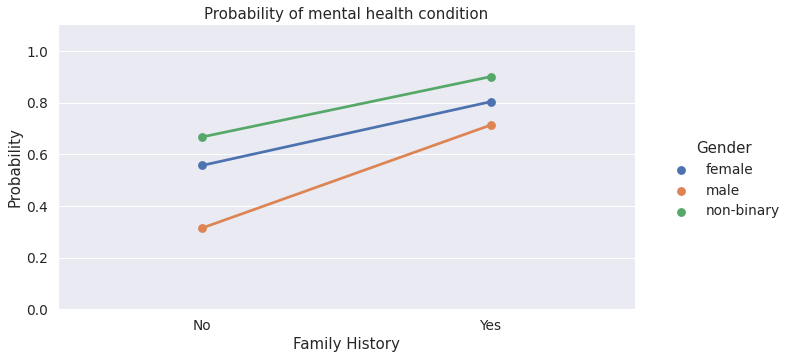

<Figure size 432x288 with 0 Axes>

In [169]:
# Plot to study the probability of mental health condition with respect to family-history and gender
# Get labels for family_history
o = labelDict['label_family_history']

# Create factorplot
g = sns.factorplot(x="family_history", y="treatment", hue="Gender", data=mhit, kind="point", ci=None, size=5, aspect=2, legend_out = True)
g.set_xticklabels(o)
g.set(ylim=(0,1.1))

# Set plot title and axis labels
plt.title('Probability of mental health condition')
plt.ylabel('Probability')
plt.xlabel('Family History')

# replace legend labels
new_labels = labelDict['label_Gender']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

# Positioning the legend
g.fig.subplots_adjust(top=0.9,right=0.8)

plt.show()
plt.savefig("Figures/gender_familyhistory_treatment.png", dpi=500)

We observe that there is higher probability to develop a mental health conditon if there is a family history of mental illness compared to if there is not a family history of mental illness. This behavior is consistent in all three gender types.

Next, we plot bargraph to study the probability of mental health condition with respect to work_interfere and gender.

##### **3.2.3 Treatment vs. Work Interfere and Gender**

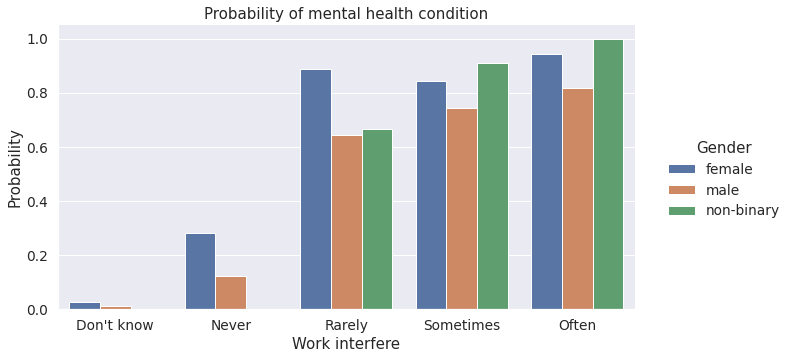

<Figure size 432x288 with 0 Axes>

In [170]:
# plot to study the probability of mental health condition with respect to work_interfere and gender
# Get labels for work_interfere
order_lables = [0,1, 3, 4,2] # order labels on x-axis for ease of interpretation 
o = [labelDict['label_work_interfere'][x] for x in order_lables]

# Create factorplot
g = sns.factorplot(x="work_interfere", y="treatment", hue="Gender", data=mhit, order=order_lables,
                   kind="bar", ci=None, size=5, aspect=2, legend_out = True)
g.set_xticklabels(o)

# Set plot title and axis labels
plt.title('Probability of mental health condition')
plt.ylabel('Probability')
plt.xlabel('Work interfere')

# replace legend labels
new_labels = labelDict['label_Gender']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

# Positioning the legend
g.fig.subplots_adjust(top=0.9,right=0.8)
plt.show()
plt.savefig("Figures/gender_workinterfere_treatment.png", dpi=500)

We observe that probability to seek treatment is high when there is work interference due to mental health conditon in all the Genders. 

Next, we plot bargraph to study the probability of seeking treatment for mental health condition with respect to benefits and care options.

##### **3.2.4 Treatment vs. Benefits and Care Options**

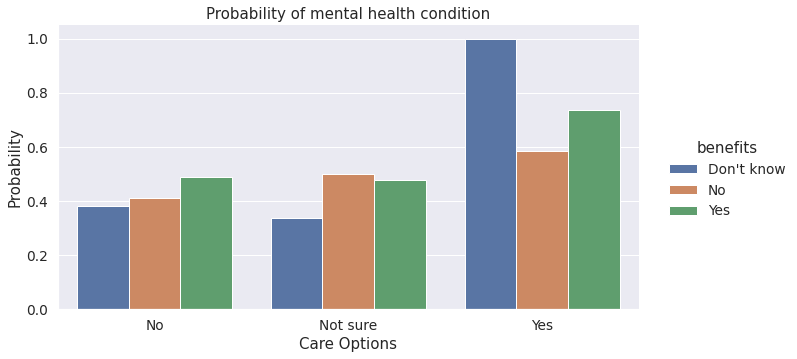

<Figure size 432x288 with 0 Axes>

In [171]:
# plot to study the probability of mental health condition with respect to care_options and benefits
# Get labels for care_options
o = labelDict['label_care_options']

# Create factorplot
g = sns.factorplot(x="care_options", y="treatment", hue="benefits", data=mhit, kind="bar", ci=None, size=5, aspect=2, legend_out = True)
g.set_xticklabels(o)

# Set plot title and axis labels
plt.title('Probability of mental health condition')
plt.ylabel('Probability')
plt.xlabel('Care Options')

# replace legend labels
new_labels = labelDict['label_benefits']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

# Positioning the legend
g.fig.subplots_adjust(top=0.9,right=0.8)
plt.show()
plt.savefig("Figures/careoptions_benefits_treatment.png", dpi=500)

The field 'benefits' reflects whether the employer provides mental health benefits. The field 'care_options' reflects whether the employee knows about the care options that their employer provides. We observe that if employees are aware of the care-options provided by their employers, then there is a higher chance to seek treatment. The higher probabilities for the segment with Care Options = Yes may also suggest that people who needed treatment made efforts to check what care options did their employer provides.

#### **4. Answering the research questions**

##### **Q1: How does the frequency of mental health illness vary by age, gender, country?**
Hypothesis: Frequency of mental health illness is different for different demographic indicators.

Let us first plot a frequency chart by Country to see the prevalence of mental health conditon by different regions.

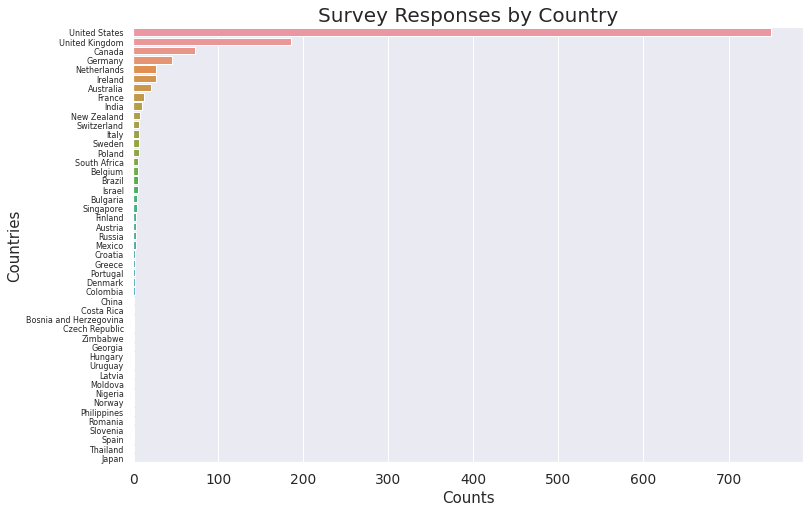

<Figure size 432x288 with 0 Axes>

In [172]:
# Survey Responses by Country
plt.figure(figsize=(12, 8))
ax = sns.countplot(y='Country', order = mhit['Country'].value_counts().index, data=mhit)
ax.set_yticklabels([labelDict['label_Country'][i] for i in mhit['Country'].value_counts().index], fontsize=8)
plt.title('Survey Responses by Country', fontsize=20)
plt.xlabel('Counts')
plt.ylabel('Countries')
plt.show()
plt.savefig("Figures/country_frequency.png", dpi=500)

We see there is a significant difference in the counts of survey responses in different countries. The survey participants are mostly from the United States, therefore, we cannot compare the frequency of mental health illness among different countries from this survey data. The counts of survey responses indicate the level of awareness around mental health issues in various countries. We see that the United States, United Kingdom, Canada, Germany, Netherlands are the top 5 countries with maximum responses.


Next, we see the trend among various states in United States, since we have suffienct data with respect to US. 

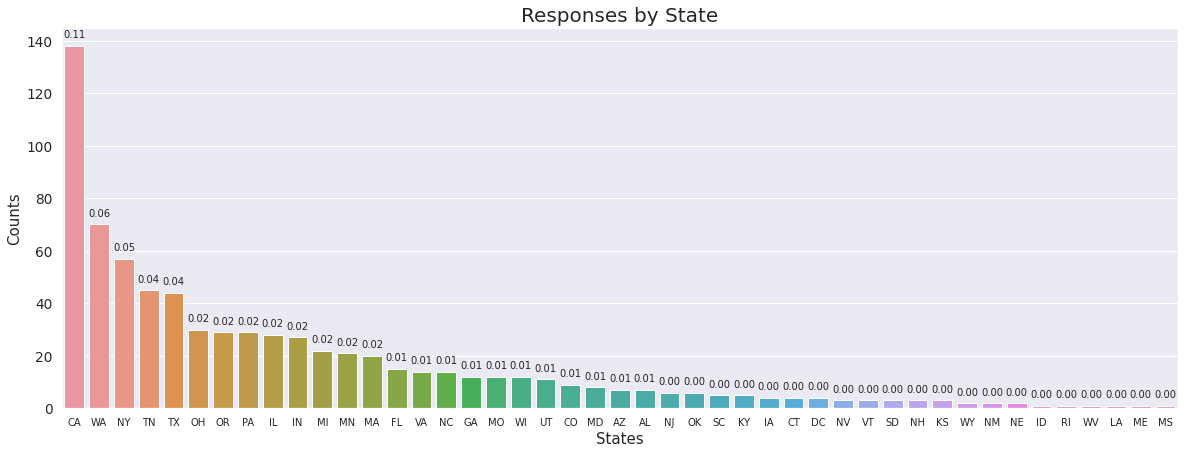

<Figure size 432x288 with 0 Axes>

In [173]:
# Survey Responses by state
# length of entire dataset
total = float(len(mhit))
# Set figure size
plt.figure(figsize=(20, 7))
# Remove rows with NaN value for region/state
mhit2 = mhit[mhit['region'] != 1]
# Create countplot
ax = sns.countplot(x='state', order = mhit2['state'].value_counts().index, data=mhit2)
ax.set_xticklabels([labelDict['label_state'][i] for i in mhit2['state'].value_counts().index], fontsize=10)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center", fontsize=10) 
plt.title('Responses by State', fontsize=20)
plt.xlabel('States')
plt.ylabel('Counts')
plt.show()
plt.savefig("Figures/state_frequency.png", dpi=500)

The numbers on top of each bar indicate the proportion of survey responses by state. We observe that most of the survey responses within US are from California, Washington, New York etc. Next we study the counts by four major regions(West, South, Midwest, Northeast).



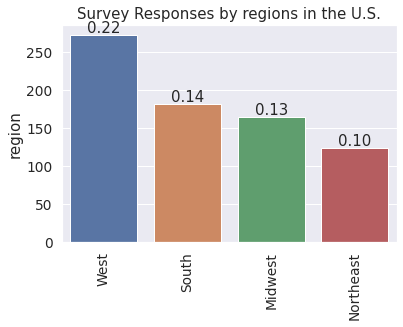

In [174]:
# Survey Responses by regions in the U.S.
# Remove rows with NaN value for region
mhit2 = mhit[mhit['region'] != 1]
# Get survey count for each region
region_frequency = mhit2['region'].value_counts()
# Get labels for regions
x = [labelDict['label_region'][i] for i in region_frequency.index]
y = region_frequency
# Plot bar graph
ax = sns.barplot(x, y)
ax.set_xticklabels(labels=x, rotation=90)
# Calculate the proportion for each region
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center") 
plt.title("Survey Responses by regions in the U.S.")
plt.savefig("Figures/region_frequency.png", dpi=500)

We see most responses have come from West region(22% of all survey responses).

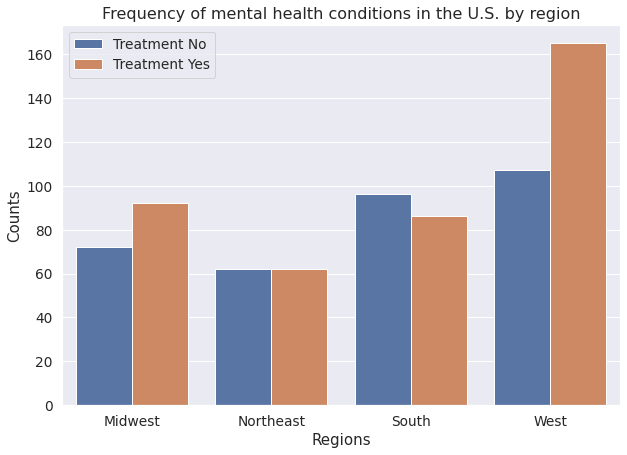

<Figure size 432x288 with 0 Axes>

In [175]:
# Plot graph to study the frequencies of mental health illness in different regions
# Set figure size
plt.figure(figsize=(10,7))
# Remove rows with NaN value for state
mhit2 = mhit[mhit['region'] != 1]
# Create countplot
ax = sns.countplot(x="region", hue="treatment", data=mhit2)
# Set plot title and axis labels
plt.title("Frequency of mental health conditions in the U.S. by region", fontsize=16)
ax.set_xticklabels(labels=['Midwest', 'Northeast', 'South', 'West'])
plt.xlabel("Regions")
plt.ylabel("Counts")
plt.legend(["Treatment No", "Treatment Yes"])
plt.show()
plt.savefig("Figures/region_treatment.png", dpi=500)

We observe that the frequencies of mental health illness are different for different regions. The regions with decreasing frequencies are West, Midwest, South, and Northeast.


##### **Answer to Research Question 1:**

We observe that the frequency of mental health illness is different for different demographic indicators such as age, gender, country, state, region. In the preceding graphs, we saw that different countries have different levels of awareness around mental health conditions reflected by the counts of survey responses by Country. With the U.S., we saw that the frequency of Mental Health Conditions varies among the four regions. <br>

Referring to the plot "gender_age_treatment.png" as created in the Exploratory Data Analysis section, we argue that the probability of mental health conditions varies with age and gender. Female and non-binary genders have a greater probability than males of having a mental health illness in all the age-groups. Non-binary genders have a greater probability of having mental health illness in the age-group 21-30, 31-65 which is a significant portion of the working population age, followed by females and then males.


##### **Q2: Does family history of mental health illness impact the frequency of mental health illnesses?**
Hypothesis: The frequency of mental health illness is independent of family history of mental health.



To test this hypothesis, we perform a chi-squared test of independence to see if the family history of mental health illness(family_history) and frequency of mental health illness(treatment) are dependent or whether the frequencies that we see in collected data are the once we would expect to get just by chance alone.

In [176]:
# Generate contingency table for "family history" and "treatment" (observed frequencies)
# import libraries
import scipy.stats as stats
# Create crosstab for variables family_history and treatment
tab_famhist_treatment = pd.crosstab(mhit["family_history"], mhit["treatment"], margins = True)
tab_famhist_treatment.columns = ["Treatment No","Treatment Yes","row_totals"]
tab_famhist_treatment.index = ["FamilyHistory No","FamilyHistory Yes","col_totals"]
# Get table without totals for later use
observed = tab_famhist_treatment.iloc[0:2,0:2]   
# Show table
tab_famhist_treatment

,Treatment No,Treatment Yes,row_totals
FamilyHistory No,495,272,767
FamilyHistory Yes,127,363,490
col_totals,622,635,1257


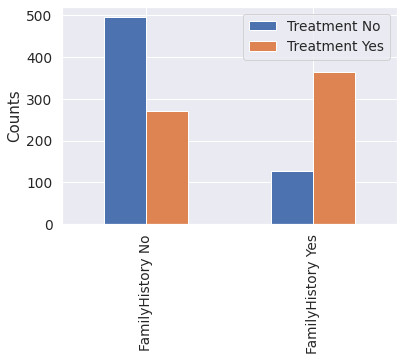

In [177]:
# Plot the graph for observed frequencies
observed.plot.bar()
plt.ylabel('Counts')
plt.savefig("Figures/familyhistory_treatment.png", dpi=500)

In [178]:
# Calculate the test statistics and interprest the test results
# import necessary methods
from scipy.stats import chi2_contingency
from scipy.stats import chi2
# Get test statistic, p-value, degree of freedom and expected frequencies
stat, p, dof, expected = chi2_contingency(tab_famhist_treatment)
# interpret test-statistic
prob = 0.95 # for 95% confidence
critical = chi2.ppf(prob, dof)
print("Critical Value: ", critical)
print("Test statistic: ", stat)
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

Critical Value:  9.487729036781154
Test statistic:  178.38566252465614
Dependent (reject H0)


##### **Answer to Research Question 2:**
 
Since the chi-square test statistic is greater than the critical value, therefore, we reject the null hypothesis that these two columns are independent. We conclude that 'Family History' and 'Treatment' are dependent and that family history of mental health impacts the frequency of mental health illness. From the figure above, we also see that there is a higher frequency of mental health illness when there is a family history compared to when there is no family history.
 



##### **Q3: Does attitude towards mental health impacts an individual’s decision to seek treatment for mental health condition?**
Hypothesis: The attitude towards mental health does not impact the individual’s decision to seek treatment for mental health condition.

 To test this hypothesis, we perform a chi-squared test of independence to see if the attitude towards mental health illness in the workplace as captured by the variable mental_health_consequence(Do you think that discussing a mental health issue with your employer would have negative consequences?) and frequency of mental health illness(treatment) are dependent or whether the frequencies that we see in collected data are the once we would expect to get just by chance alone.

In [179]:
# Generate contingency table for "mental_health_consequence" and "treatment" (observed frequencies)
tab_consequence_treatment = pd.crosstab(mhit["mental_health_consequence"], mhit["treatment"], margins = True)
tab_consequence_treatment.columns = ["Treatment No","Treatment Yes","row_totals"]
tab_consequence_treatment.index = ["Consequence Maybe", "Consequence No","Consequence Yes","col_totals"]
# Get observed frequencies without totals for later use
observed = tab_consequence_treatment.iloc[0:3,0:2]   
# Show table
tab_consequence_treatment

,Treatment No,Treatment Yes,row_totals
Consequence Maybe,224,253,477
Consequence No,280,210,490
Consequence Yes,118,172,290
col_totals,622,635,1257


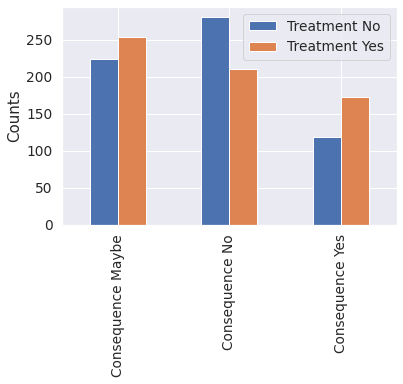

In [180]:
# Plot the graph for observed frequencies
observed.plot.bar()
plt.ylabel('Counts')
plt.savefig("Figures/consequence_treatment.png", dpi=500)

respondents who feel discussing their mental health issues with the employer can have a negative consequence account for more number of treatment seekers than non-seekers.

Next, we perform the chi-square test using the above contingency table.


In [181]:
# Calculate the test statistics and interprest the test results
# Get test statistic, p-value, degree of freedom and expected frequencies
stat, p, dof, expected = chi2_contingency(tab_consequence_treatment)
# interpret test-statistic
prob = 0.95 # for 95% confidence
critical = chi2.ppf(prob, dof)
print("Critical Value: ", critical)
print("Test statistic: ", stat)
if abs(stat) >= critical:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

Critical Value:  12.591587243743977
Test statistic:  21.686147565229366
Dependent (reject H0)


##### **Answer to Research Question 3:**
 
Since the chi-square test statistic is greater than the critical value, therefore, we reject the null hypothesis that these two columns are independent. We conclude that 'mental_health_consequence' and 'Treatment' are dependent and that the employer's attitude towards mental health issues impacts an individual’s decision to seek treatment for a mental health condition. From the figure above we see that more individuals seek treatment when there are negative consequences for discussing mental health issues with employers.
 



##### **Q4: What are the strongest predictors of mental health illness due to workplace environment?**
Hypothesis: A workplace that provides medical health benefits, awareness for care options to employees, safe environment to discuss the mental health issues with supervisor and peers contribute towards the better mental health of employees as opposed to a workplace that does not prioritize their employees’ health.

We use logistic regression to model the predictors ('Age', 'Gender', 'family_history', 'benefits', 'care_options', 'anonymity', 'leave', 'work_interfere', ‘remote_work’, ‘self_employed’, ‘coworkers’, ‘supervisor’) on the dependent variable ‘Treatment’ and find out which of these variables strongly predict(based on p-value of each predictor) whether an individual has a mental health condition and therefore needs treatment.
 
 
 



Before we do any modelling, we will first scale the 'Age' column so that it is normalized. 

In [182]:
# Scale Age
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
mhit['Age'] = scaler.fit_transform(mhit[['Age']])
mhit.head()

,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,age_groups,region
0,0.351852,0,44,10,0,0,1,2,4,0,1,2,1,1,2,2,2,1,1,1,2,1,0,2,0,2,0
1,0.481481,1,44,11,0,0,0,3,5,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,2,0
2,0.259259,1,6,29,0,0,0,3,4,0,1,1,0,1,1,0,1,1,1,2,2,2,2,1,0,2,1
3,0.240741,1,43,29,0,1,1,2,2,0,1,1,2,1,1,1,1,2,2,1,0,0,0,1,1,2,1
4,0.240741,1,44,38,0,0,0,1,1,1,1,2,0,0,0,0,0,1,1,1,2,2,2,0,0,2,3


Now, let's us create training and test set split.

In [183]:
# split the dataset into train and test sets
from sklearn.model_selection import train_test_split
# define feature columns
feature_cols = ['Age', 'Gender', 'family_history', 'benefits', 'care_options', 'anonymity', 
                'leave', 'work_interfere','remote_work', 'self_employed', 'coworkers', 'supervisor']
# define predictor and response variables                
X = mhit[feature_cols]
y = mhit.treatment
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

First, we will build a random forest to generate feature importance list and then will we fit logistic regression to see which predictors impact positively and which impact negatively. 

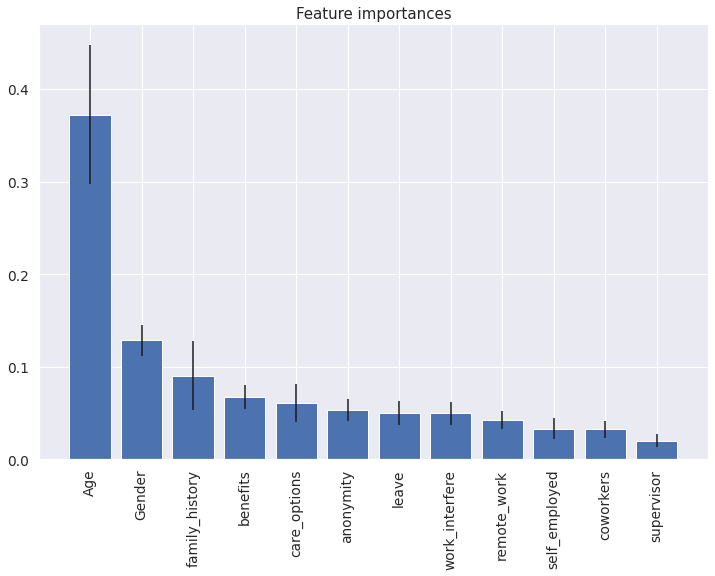

In [184]:
# Build a forest and compute the feature importances
from sklearn.ensemble import ExtraTreesClassifier
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X_train, y_train)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

labels = []
for f in range(X.shape[1]):
    labels.append(feature_cols[f])      
    
# Plot the feature importances of the forest
plt.figure(figsize=(12,8))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), labels, rotation='vertical')
plt.xlim([-1, X.shape[1]])
plt.show()

From the above random forest model we see that age, gender, family history which are personal factors are the most important. After them, the workplace factors such as benefits, care_options, anonymity and leave become important in determining whether an individual seeks treatment for a mental illness or not. 

Next, we check the accuracy of Random Forest model.

Percentage of ones: 0.4947089947089947
Percentage of zeros: 0.5052910052910053


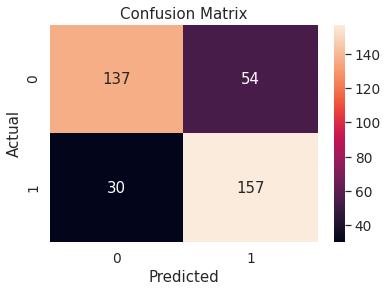

Classification Accuracy: 0.7777777777777778
Classification Error: 0.2222222222222222
False Positive Rate: 0.28272251308900526
Precision: 0.7440758293838863
Recall: 0.839572192513369
AUC Score: 0.7784248397121819


In [185]:
## Check accuracy of Random Forest
# import necessary libraries
from sklearn import metrics
from sklearn.model_selection import cross_val_score

# make class predictions for the testing set
y_pred_class = forest.predict(X_test)
y_pred_prob = forest.predict_proba(X_test)

# calculate the percentage of ones in test set
print('Percentage of ones:', y_test.mean())

# calculate the percentage of zeros in test set 
print('Percentage of zeros:',1 - y_test.mean())

# Confusion matrix
# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, y_pred_class)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

# visualize Confusion Matrix
sns.heatmap(confusion,annot=True,fmt="d") 
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Calculate performance metrics
accuracy = metrics.accuracy_score(y_test, y_pred_class)
print('Classification Accuracy:', accuracy)
# Misclassification Error: Overall, how often is the classifier incorrect?
print('Classification Error:', 1 - metrics.accuracy_score(y_test, y_pred_class))
# False Positive Rate: When the actual value is negative, how often is the prediction incorrect?
false_positive_rate = FP / float(TN + FP)
print('False Positive Rate:', false_positive_rate)
# Precision: When a positive value is predicted, how often is the prediction correct?
print('Precision:', metrics.precision_score(y_test, y_pred_class))
# Recall: How many positive values predicted correctly by the actual number of positives?
print('Recall:', metrics.recall_score(y_test, y_pred_class))
# AUC Score: Area under the ROC curve
print('AUC Score:', metrics.roc_auc_score(y_test, y_pred_class))

Now, to determine which factors effect positively or negatively, we study the predictor coefficients given by logistic regression model.

In [186]:
# Fit Logistic Regression on training data
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
# Print model summary
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.466062
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              treatment   No. Observations:                  879
Model:                          Logit   Df Residuals:                      867
Method:                           MLE   Df Model:                           11
Date:                Thu, 10 Dec 2020   Pseudo R-squ.:                  0.3274
Time:                        04:50:01   Log-Likelihood:                -409.67
converged:                       True   LL-Null:                       -609.11
Covariance Type:            nonrobust   LLR p-value:                 1.055e-78
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Age               -1.7249      0.608     -2.835      0.005      -2.917      -0.532
Gender           

Observations:
- With increasing age, the odds to seek treatment decreases. This may also be due to less respondents in the age-group 66-100.
- Gender has negative coefficient meaning that females have higher probability to seek treatment than males.
- Having family history of mental illness increases the odds to seek treatment for mental illness.
- Benefits, care-options, anonymity have positive effects, i.e. if the employer provides benefits, employees know about the care-options and anonymity of individuals seeking treatment is preserved, then there are higher odds of seeking treatment.
- If mental illness interferes in work, then probability to seek treatment is high.


Next, we check the accuracy of logistic regression model.

Percentage of ones: 0.4947089947089947
Percentage of zeros: 0.5052910052910053


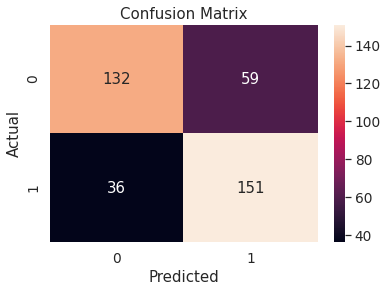

Classification Accuracy: 0.7486772486772487
Classification Error: 0.2513227513227513
False Positive Rate: 0.3089005235602094
Precision: 0.719047619047619
Recall: 0.8074866310160428
AUC Score: 0.829716941512445


In [187]:
## Check performance of logistic regression model
# make class predictions for the testing set
y_pred_prob = result.predict(X_test)
y_pred_class = list(map(round, y_pred_prob))

# calculate the percentage of ones in test set
print('Percentage of ones:', y_test.mean())

# calculate the percentage of zeros in test set 
print('Percentage of zeros:',1 - y_test.mean())

# Confusion matrix
# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, y_pred_class)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

# visualize Confusion Matrix
sns.heatmap(confusion,annot=True,fmt="d") 
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Metrics computed from a confusion matrix
# Classification Accuracy: Overall, how often is the classifier correct?
accuracy = metrics.accuracy_score(y_test, y_pred_class)
print('Classification Accuracy:', accuracy)
# Misclassification Error: Overall, how often is the classifier incorrect?
print('Classification Error:', 1 - metrics.accuracy_score(y_test, y_pred_class))
# False Positive Rate: When the actual value is negative, how often is the prediction incorrect?
false_positive_rate = FP / float(TN + FP)
print('False Positive Rate:', false_positive_rate)
# Precision: When a positive value is predicted, how often is the prediction correct?
print('Precision:', metrics.precision_score(y_test, y_pred_class))
# Recall: How many positive values predicted correctly by the actual number of positives?
print('Recall:', metrics.recall_score(y_test, y_pred_class))
# AUC Score: Area under the ROC curve
print('AUC Score:', metrics.roc_auc_score(y_test, y_pred_prob))

We see that Random Forest out-performs the logistic regression model on this dataset.

##### **Answer to Research Question 4:**
 
Observing the p-values from the logistic regression table, we see that Age, Gender, family_history, work_interfere, supervisor, and anonymity(although p-val = 0.078, but still strong) are important factors that affect the frequency of mental health illness in the work environment. Out of these variables, Age, Gender, family_history, and work_interfere are personal factors and we saw each of their impact on the probability of having mental health illness in the previous sections. The variables
- Benefits - Does your employer provide mental health benefits?
- care-options - Do you know the options for mental health care your employer provides?
- supervisor - Would you be willing to discuss a mental health issue with your direct supervisor(s)?
- anonymity - Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources? <br>
 
conveys the attitude towards mental health illness in the workplace environment and impacts a person's ability to seek treatment.
 



### **VII. Results and Discussion**

- The probability of developing a mental health condition depends on personal factors like age, gender, and whether or not an individual has a family history of such conditions.
- We observe that females and non-binary genders have more probability to develop a mental health condition than males.
- Having a family history of mental health conditions increases the odds to have a mental health illness.
- Although we see different distributions in the frequency of having a mental health condition by country, state, and region, we cannot make any strong claims whether on not a geographical location has an impact on an individual's mental health because we do not have enough data points.
- We see that having a negative consequence of discussing a mental health issue with an employer impacts an individual's decision to seek treatment.
- Positive Workplace attitudes and policies below will contribute to bettering the mental health of employees.
 - Providing employees with medical benefits, care options, resources, and awareness about these programs.
 - Creating a safe place to discuss mental issues with supervisors and peers.
 - Protecting the anonymity of individuals seeking help.
 - Creating an environment of trust with employees and ensuring that they won’t suffer the negative consequences of having a mental illness.
 
 



### **VIII. Limitations**



 
- Survey data is skewed, the majority of survey participants are from the US and very few from low-income countries.
- The small sample size (1259 participant) and skewness makes it difficult to claim whether the region/country affects the mental health of people working there.
- The survey is not administered to a representative sample and so the results are not generalizable to a broader population.
- Due to the qualitative nature of data, the analysis is heavily dependent on the range of options for each categorical question.
- Not sufficient objectivity in data.
- Inherent bias in data collection steps.
- The variable, treatment (Have you sought treatment for a mental health condition?) may not be representative of the fact that whether an individual suffers from a mental illness.
 



### **IX. Conclusion**

The analysis reveals that in addition to personal factors impacting mental health such as age, gender, family history, the workplace environment also affects the mental health and individual’s decision to seek treatment. An organization that provides benefits, care options for mental illnesses and protects the anonymity of individuals seeking treatment creates a positive environment where employees are encouraged to seek help. Along with providing care options, it is equally important to spread awareness about the care programs for such measures to be effective. Seeking treatment reduces the chances of mental illness. Employers should also provide a safe environment where employees can share their mental health issues with supervisors and peers with confidentiality and trust and do not suffer any negative consequences. Such policies and measures will make the tech industry a better workplace.

### **X. References**


1. [Pandey, Shambhavi, et al. “Factors Affecting Mental Health in Employees and Their Relation to Suicide Rates at a Workplace.”]( https://www.sas.com/content/dam/SAS/support/en/sas-global-forum-proceedings/2019/3966-2019.pdf)

2. [InfoQ articles](https://www.infoq.com/articles/mental-health-tech-workplace/)

3. [OSMI Research blog](https://osmihelp.org/research)